# CDF  QQ Plot
* get runtimes data: ``````

In [24]:
#Filtering data based on machine type
import json
import pandas as pd
import numpy as np
import time
import datetime
import dateutil.parser
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import math
from scipy.integrate import quad
from scipy.optimize import curve_fit
import glob
import inspect
import itertools

#Instance types as a dic
def load_all_data():
    model_paths = ['Our Model', 'Classical Exponential', 'Classic Weibull', 'Gompertz-Makeham']
    all_data = {}
    for model in model_paths:
        path = 'runtime-data-by-group-qq-plot/'+model+'/*qqplot.txt'
        try:
            text_ = { file.split('\\')[-1].split('.')[0].replace('_qqplot',''): np.loadtxt(file) for file in sorted(glob.iglob(path))}

        except Exception as msg:
            print(msg)
            raise
        all_data[model]=text_
    return all_data

def plot_for_comparison(all_data, group_name):
   
    matplotlib.rcParams.update({'font.size': 18})
    fig,ax = plt.subplots()
    colors = itertools.cycle(['r','k', 'brown'])
    for m in all_data:
        data_to_fit = all_data[m][group_name]
        fig.set_size_inches(10,6)
        color=next(colors)
        #ax.scatter(data_to_fit[:,1], data_to_fit[:,2], marker='x',color=color, label=r'')
        ax.scatter(data_to_fit[:,1], data_to_fit[:,2], marker='x', label=m)
        
    ax.set_ylim((0,1))
    ax.set_xlim((0,1))
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x, linestyle='--', color= 'black',label='Perfect Quantile Match')
    ax.legend(fontsize='small')
    ax.set_xlabel("Actual CDF Quantiles")
    ax.set_ylabel("Proposed CDF Quantiles")
    ax.set_title('Blended Exponential')
    #plt.savefig('../graphs/cdf_comparison_3.pdf',bbox_inches='tight')

In [25]:
#Get instance data
all_data = load_all_data()
#all_data

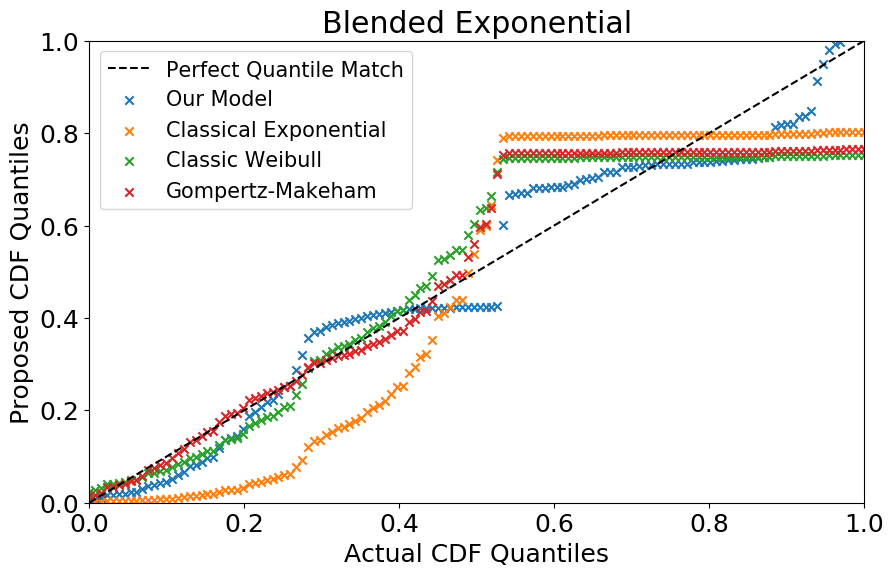

In [26]:
plot_for_comparison(all_data, group_name='n1-highcpu-16')

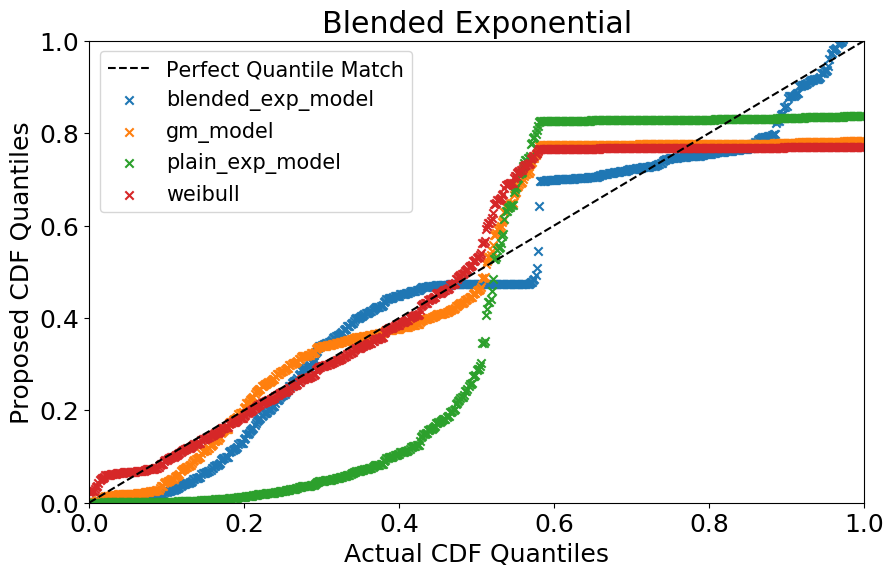

In [23]:
plot_for_comparison(all_data, group_name='Day')